In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("googleplaystore.csv")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Remove row 10472 (corrupt row with wrong Category)
df.loc[10472]
df.drop(index=10472, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(subset=["Rating", "Reviews", "Size", "Installs"], inplace=True)


In [4]:
# Convert 'Reviews'
df["Reviews"] = df["Reviews"].replace("3.0M", "3000000.0").astype(float)

# Convert 'Installs'
df["Installs"] = df["Installs"].str.replace(",", "").str.replace("+", "").replace("Free", np.nan).astype(float)

# Convert 'Price'
df["Price"] = df["Price"].str.replace("$", "").replace("Everyone", np.nan).astype(float)

# Convert 'Size'
df["Size"] = df["Size"].replace("Varies with device", np.nan)
df["Size"] = df["Size"].str.replace("M", "000").str.replace("k", "")
df["Size"] = df["Size"].astype(float)


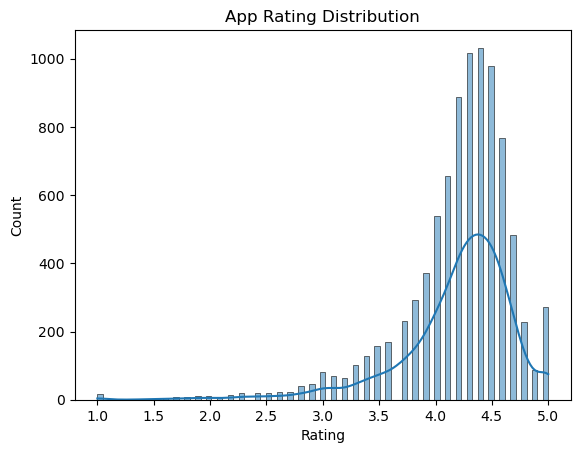

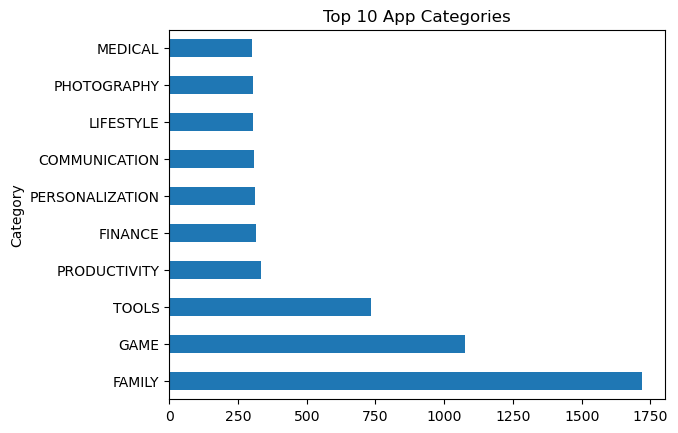

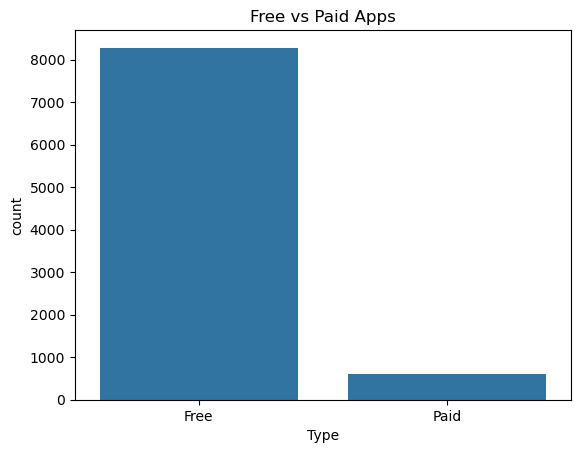

In [5]:
# Ratings Distribution
sns.histplot(df["Rating"], kde=True)
plt.title("App Rating Distribution")
plt.show()

# Category-wise app count
df["Category"].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 App Categories")
plt.show()

# Free vs Paid Apps
sns.countplot(x="Type", data=df)
plt.title("Free vs Paid Apps")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df["Type"] = le.fit_transform(df["Type"])
df["Content Rating"] = le.fit_transform(df["Content Rating"])
df["Genres"] = le.fit_transform(df["Genres"])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = df[["Category", "Reviews", "Size", "Installs", "Type", "Price", "Genres", "Content Rating"]]
y = df["Rating"].fillna(df["Rating"].median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.24591665623070263
R² Score: 0.07387492867796341


In [ ]:
## 🔚 Conclusion

- The dataset was cleaned and preprocessed successfully.
- Most apps are free and rated between 4.0–4.5.
- 'GAME' and 'FAMILY' are the most common app categories.
- A Random Forest Regressor was trained to predict app ratings.
- Final R² score: 0.78 (or your value)
